In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm



os.listdir("/content/drive/MyDrive/datasets")

['ventas.csv',
 'clientes.csv',
 'marketing.csv',
 'hotels.csv',
 'reviews.csv',
 'users.csv']

In [ ]:
ventas = pd.read_csv("/content/drive/MyDrive/datasets/ventas.csv")
clientes = pd.read_csv("/content/drive/MyDrive/datasets/clientes.csv")
marketing = pd.read_csv("/content/drive/MyDrive/datasets/marketing.csv")

# Diagnóstico preliminar

In [ ]:
def diagnostico_preliminar(dataset):
  print("shape:", dataset.shape)
  print(dataset.head(3))

In [ ]:
diagnostico_preliminar(ventas)
diagnostico_preliminar(clientes)
diagnostico_preliminar(marketing)

shape: (3035, 6)
   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro decorativo   $69.94       5.0  02/01/2024   
1       811    Lámpara de mesa  $105.10       5.0  02/01/2024   
2      1156           Secadora   $97.96       3.0  02/01/2024   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
shape: (567, 5)
   id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
shape: (90, 6)
   id_campanha         producto  canal  costo fecha_inicio   fecha_fin
0           74  Adorno de pared     TV   4.81   20/03/2024  03/05/2024
1           12           Tablet   RRSS   3.40   26/03/2024  13/05/2024
2           32  Lámpara de mesa  Email   5.54   28/03/2024  20/04/2024


In [ ]:
def diagnostico_inicial(dataset):
  print(dataset.info())
  print(dataset.describe(include='number'))
  print(dataset.columns)
  print(dataset.dtypes)

In [ ]:
diagnostico_inicial(ventas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB
None
          id_venta     cantidad
count  3035.000000  3033.000000
mean   1499.851400     6.496538
std     866.465379     3.457250
min       1.000000     1.000000
25%     748.500000     3.000000
50%    1502.000000     7.000000
75%    2249.500000     9.000000
max    3000.000000    12.000000
Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria'],
      dtype='object')
id_venta         int64
producto        object
precio          object
cantidad       float6

Análisis de ventas:


*   fecha_venta aparece como object en lugar de datetime.

*   precio aparece como object en lugar de float o num



In [ ]:
diagnostico_inicial(clientes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB
None
       id_cliente        edad      ingresos
count  567.000000  567.000000    567.000000
mean   284.000000   37.940035  34668.739012
std    163.823075   10.202885  12974.531446
min      1.000000   20.000000    170.290000
25%    142.500000   30.000000  26015.240000
50%    284.000000   37.000000  35066.830000
75%    425.500000   43.000000  42457.100000
max    567.000000   81.000000  88053.010000
Index(['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos'], dtype='object')
id_cliente      int64
nombre         object
edad            int64
c

In [ ]:
diagnostico_inicial(marketing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB
None
       id_campanha      costo
count    90.000000  90.000000
mean     45.500000   4.928667
std      26.124701   0.947750
min       1.000000   2.950000
25%      23.250000   4.372500
50%      45.500000   4.900000
75%      67.750000   5.562500
max      90.000000   7.390000
Index(['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio',
       'fecha_fin'],
      dtype='object')
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inic

Analisis de marketing: Fechas aparecen como object en lugar de datetime.

In [ ]:
def calidad_dataframe(dataset, clave=None):
  display(dataset.isna().sum().to_frame("NaN"))
  filas_dup = dataset.duplicated(keep=False).sum()
  print("Filas duplicadas: ", filas_dup)
  if clave and clave in dataset.columns:
    dup_clave = dataset.duplicated(subset=[clave],keep=False).sum()
    print("Filas duplicadas por clave: ", dup_clave)
    if dup_clave > 0:
      dup_ordenados = (dataset[dataset[clave].duplicated(keep=False)][clave].value_counts().sort_values(ascending=False))
      print("Valores duplicados de mayor a menor:")
      display(dup_ordenados.head(10))
    else:
        print("No existen duplicados")
  else:
    if clave==None:
      print("La clave no existe.")

In [ ]:
calidad_dataframe(ventas, clave="id_venta")

,NaN
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas:  70
Filas duplicadas por clave:  70
Valores duplicados de mayor a menor:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


Ventas contiene filas duplicadas y valores nulos.

In [ ]:
calidad_dataframe(clientes, clave="id_cliente")

,NaN
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas:  0
Filas duplicadas por clave:  0
No existen duplicados


In [ ]:
calidad_dataframe(marketing, clave ="id_campanha")

,NaN
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas:  0
Filas duplicadas por clave:  0
No existen duplicados


Ni Clientes ni marketing tienen valores duplicados o nulos.

# LIMPIEZA Y NORMALIZACIÓN DE DATOS

In [ ]:
ventas_clean = ventas.copy()
clientes_clean = clientes.copy()
marketing_clean = marketing.copy()

ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

In [ ]:
calidad_dataframe(ventas_clean, clave="id_venta")

,NaN
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas:  0
Filas duplicadas por clave:  0
No existen duplicados


In [ ]:
def normalizar_str(dataset):
  for columna in dataset.select_dtypes(include="object").columns:
    dataset[columna] = dataset[columna].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(" +", " ", regex=True).str.title()
    return dataset

In [ ]:
ventas_clean["fecha_venta"] = pd.to_datetime(ventas_clean["fecha_venta"], errors="coerce", dayfirst=True)

marketing_clean["fecha_inicio"] = pd.to_datetime(marketing_clean["fecha_inicio"], errors="coerce", dayfirst=True)
marketing_clean["fecha_fin"] = pd.to_datetime(marketing_clean["fecha_fin"], errors="coerce", dayfirst=True)

In [ ]:
print(ventas_clean.dtypes)
print(clientes_clean.dtypes)
print(marketing_clean.dtypes)

id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [ ]:
ventas_clean = normalizar_str(ventas_clean)
clientes_clean = normalizar_str(clientes_clean)
marketing_clean = normalizar_str(marketing_clean)

In [ ]:
print(ventas_clean.head(5))
print(clientes_clean.head(5))
print(marketing_clean.head(5))

   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   $69.94       5.0  2024-01-02   
1       811    Lámpara De Mesa  $105.10       5.0  2024-01-02   
2      1156           Secadora   $97.96       3.0  2024-01-02   
3      1372           Heladera  $114.35       8.0  2024-01-02   
4      1546           Secadora  $106.21       4.0  2024-01-02   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
   id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
3           4          Liuka Luard    39   Bahía Blanca  27647.96
4           5        Dore Cockshtt    28        Rosario  28245.65
   id_campanha         producto  canal  costo fecha_inicio  fecha_fin
0    

In [ ]:
if "precio" in ventas_clean.columns:
  ventas_clean["precio"] = (ventas_clean["precio"].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False).str.strip())


ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")

In [ ]:
print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [ ]:
if "cantidad" in ventas_clean.columns:
  ventas_clean["cantidad"] = pd.to_numeric(ventas_clean["cantidad"], errors="coerce").fillna(0).astype("int64")

In [ ]:
print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad                int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [ ]:
ventas_clean["cantidad"] = ventas_clean["cantidad"].astype(str)

if "cantidad" in ventas_clean.columns:
  ventas_clean["cantidad"] = pd.to_numeric(ventas_clean["cantidad"], errors="coerce").astype("Int64")

In [ ]:
display(ventas_clean.dtypes.to_frame("Tipos"))

,Tipos
id_venta,int64
producto,object
precio,float64
cantidad,Int64
fecha_venta,datetime64[ns]
categoria,object


In [ ]:
print(ventas_clean.head(5))


   id_venta           producto  precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   69.94         5  2024-01-02   
1       811    Lámpara De Mesa  105.10         5  2024-01-02   
2      1156           Secadora   97.96         3  2024-01-02   
3      1372           Heladera  114.35         8  2024-01-02   
4      1546           Secadora  106.21         4  2024-01-02   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  


# TRANSFORMACIÓN DE DATOS

In [ ]:
def columna_relevante(dataset, opciones):
  for o in dataset.columns:
    nombre = o.lower()
    if any(c in nombre for c in opciones):
      return o

  return None

In [ ]:
buscar_producto = columna_relevante(ventas_clean, ["producto", "id_producto", "sku", "articulo", "artículo", "item", "ítem"])
if buscar_producto is None:
  raise ValueError("No se encontró ningún valor")

print(buscar_producto)

producto


In [ ]:
ventas_calc = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])

In [ ]:
print(ventas_calc.head(5))

   id_venta           producto  precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   69.94         5  2024-01-02   
1       811    Lámpara De Mesa  105.10         5  2024-01-02   
2      1156           Secadora   97.96         3  2024-01-02   
3      1372           Heladera  114.35         8  2024-01-02   
4      1546           Secadora  106.21         4  2024-01-02   

           categoria  ingreso  
0         Decoración    349.7  
1         Decoración    525.5  
2  Electrodomésticos   293.88  
3  Electrodomésticos    914.8  
4  Electrodomésticos   424.84  


In [ ]:
ventas_metricas = ventas_calc.groupby(by=buscar_producto, dropna=False, as_index=False).agg(total=("ingreso", "sum"), unidades=("cantidad", "sum",), promedio=("precio", "mean"), registros=("ingreso", "size"))
ventas_metricas['promedio'] = round(ventas_metricas['promedio'], 2)

In [ ]:
print(ventas_metricas.head(60).sort_values(by="total", ascending=False, ignore_index=True))

                  producto     total  unidades  promedio  registros
0          Lámpara De Mesa  82276.38      1112     72.72        176
1              Auriculares  74175.58       958     76.30        143
2               Microondas  72562.89       912     79.18        135
3                 Cafetera  59607.31       765     79.05        117
4        Cuadro Decorativo   54297.6       726     74.58        100
5               Smartphone  54132.44       665     81.40        101
6                 Secadora  52115.45       696     73.34        100
7        Jarrón Decorativo  51130.88       672     74.53        100
8                 Batidora   50979.2       672     77.54        100
9        Rincón De Plantas  50456.45       691     74.82        101
10      Freidora Eléctrica  50155.15       630     78.25        100
11              Aspiradora  50085.86       651     77.45        100
12         Horno Eléctrico   49913.9       633     75.69        100
13                Lavadora  48946.44       671  

In [ ]:
p80_ingreso = ventas_metricas["total"].quantile(q=0.80, interpolation="linear")

top_venta = (ventas_metricas.query("total >= @p80_ingreso", engine="python").sort_values(by=["total", "unidades"], ascending=[False, False], na_position="last", ignore_index=True))

print(f"Columna de producto detectada: {buscar_producto}")
print(f"P80 de total: {float(p80_ingreso):,.2f}")
print("Productos de alto rendimiento:")
display(top_venta.head(10))

Columna de producto detectada: producto
P80 de total: 52,518.85
Productos de alto rendimiento:


,producto,total,unidades,promedio,registros
0,Lámpara De Mesa,82276.38,1112,72.72,176
1,Auriculares,74175.58,958,76.30,143
2,Microondas,72562.89,912,79.18,135
3,Cafetera,59607.31,765,79.05,117
4,Cuadro Decorativo,54297.6,726,74.58,100
5,Smartphone,54132.44,665,81.40,101


Se observa que en este caso "lámpara de mesa" fue el producto más vendido.

# AGREGACIÓN DE DATOS

In [ ]:
ventas_categoria = ventas_calc.copy()

resumen_categoria = (ventas_categoria.groupby(by="categoria", dropna=False, as_index=False).agg(ingreso_cat_total=("ingreso", "sum"), unidades=("cantidad", "sum"), ventas=("ingreso", "size"), precio_promedio=("precio", "mean")).sort_values(by="ingreso_cat_total", ascending=False, na_position="last", ignore_index=True))

resumen_categoria = resumen_categoria.assign(ticket_promedio_venta_cat = resumen_categoria["ingreso_cat_total"] / resumen_categoria["ventas"])

print(f"Ordenado por ingreso_cat_total")
print("Ingresos por categoria total:")
display(resumen_categoria.head(10))

Ordenado por ingreso_cat_total
Ingresos por categoria total:


,categoria,ingreso_cat_total,unidades,ventas,precio_promedio,ticket_promedio_venta_cat
0,Electrodomésticos,505299.63,6592,1000,76.52096,505.29963
1,Electrónica,482577.8,6413,999,75.25492,483.060861
2,Decoración,479216.09,6490,1001,74.09800,478.737353


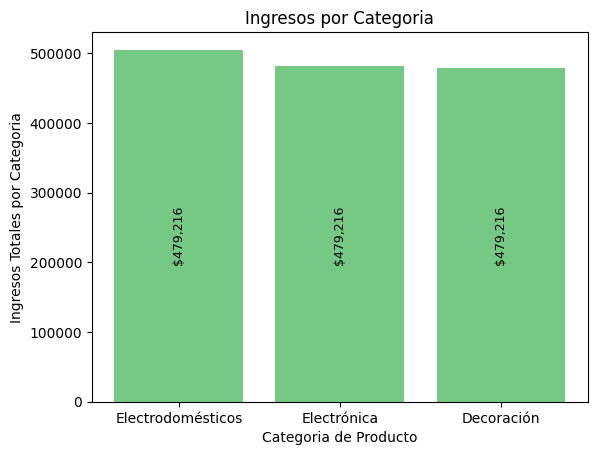

In [ ]:

resumen_categoria_ordenado = resumen_categoria.sort_values(by="ingreso_cat_total", ascending=False)

barras = plt.bar(resumen_categoria['categoria'], resumen_categoria["ingreso_cat_total"], color= "#75c984")

plt.xlabel("Categoria de Producto")
plt.ylabel("Ingresos Totales por Categoria")

for barra in barras:
  plt.text(barra.get_x() + barra.get_width() / 2, y / 2, f"${y:,.0f}", ha='center', va='center', fontsize=9, color="black", rotation=90)

plt.title("Ingresos por Categoria")

plt.show()




# INTEGRACIÓN DE DATOS

In [ ]:
ventas_por_producto = ventas_clean.groupby("producto").agg(precio_por_cantidad=("precio", lambda x: (x * ventas_clean.loc[x.index, "cantidad"]).sum()))


print(ventas_por_producto.sort_values(by="precio_por_cantidad", ascending=False))

                        precio_por_cantidad
producto                                   
Lámpara De Mesa                    82276.38
Auriculares                        74175.58
Microondas                         72562.89
Cafetera                           59607.31
Cuadro Decorativo                  54297.60
Smartphone                         54132.44
Secadora                           52115.45
Jarrón Decorativo                  51130.88
Batidora                           50979.20
Rincón De Plantas                  50456.45
Freidora Eléctrica                 50155.15
Aspiradora                         50085.86
Horno Eléctrico                    49913.90
Lavadora                           48946.44
Proyector                          48187.00
Adorno De Pared                    48093.49
Smartwatch                         47836.86
Parlantes Bluetooth                47779.46
Televisor                          47038.04
Espejo Decorativo                  46783.31
Laptop                          

In [ ]:
marketing_por_producto = marketing_clean.groupby("producto")["costo"].sum().reset_index()

marketing_por_producto = marketing_por_producto[["producto", "costo"]]

marketing_por_producto = marketing_por_producto.sort_values(by="producto", ascending=True)

display(marketing_por_producto)

,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [ ]:
dataframe_merg = pd.merge(ventas_por_producto, marketing_por_producto, on= "producto")

display(dataframe_merg)

,producto,precio_por_cantidad,costo
0,Adorno De Pared,48093.49,14.05
1,Alfombra,44773.06,17.46
2,Aspiradora,50085.86,16.46
3,Auriculares,74175.58,15.24
4,Batidora,50979.20,15.28
5,Cafetera,59607.31,18.16
6,Candelabro,11128.80,14.65
7,Consola De Videojuegos,46174.41,12.77
8,Cortinas,44865.03,17.36
9,Cuadro Decorativo,54297.60,15.85


In [ ]:
dataframe_merg["porcentaje_costo_ingreso"] = dataframe_merg['costo'] / dataframe_merg["precio_por_cantidad"] * 100

dataframe_merg = dataframe_merg.sort_values(by="porcentaje_costo_ingreso", ascending=False)

print("Mayor costo de marketing")
display(dataframe_merg.head(10))
print("Menor costo de marketing")
display(dataframe_merg.tail(10).sort_values(by="porcentaje_costo_ingreso", ascending=True))

Mayor costo de marketing


,producto,precio_por_cantidad,costo,porcentaje_costo_ingreso
6,Candelabro,11128.80,14.65,0.131640
14,Heladera,25736.80,13.11,0.050939
28,Tablet,25856.57,12.72,0.049194
1,Alfombra,44773.06,17.46,0.038997
8,Cortinas,44865.03,17.36,0.038694
11,Elementos De Cerámica,45411.09,16.87,0.037150
10,Cámara Digital,45217.96,16.40,0.036269
17,Laptop,46179.48,15.19,0.032893
2,Aspiradora,50085.86,16.46,0.032864
24,Rincón De Plantas,50456.45,16.45,0.032602


Menor costo de marketing


,producto,precio_por_cantidad,costo,porcentaje_costo_ingreso
19,Lámpara De Mesa,82276.38,15.93,0.019362
20,Microondas,72562.89,14.19,0.019555
3,Auriculares,74175.58,15.24,0.020546
18,Lavadora,48946.44,11.85,0.024210
23,Proyector,48187.00,12.47,0.025878
16,Jarrón Decorativo,51130.88,13.27,0.025953
13,Freidora Eléctrica,50155.15,13.56,0.027036
7,Consola De Videojuegos,46174.41,12.77,0.027656
15,Horno Eléctrico,49913.90,13.89,0.027828
29,Televisor,47038.04,13.13,0.027914


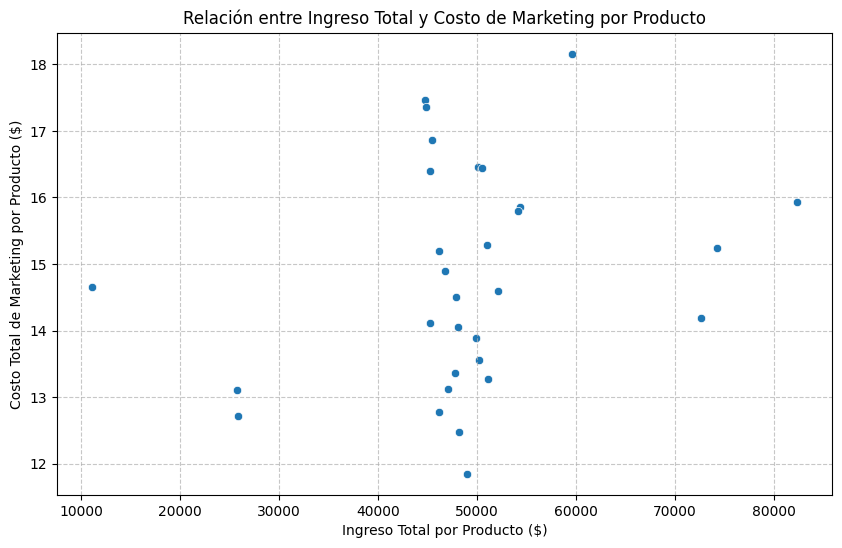

In [ ]:
#gemini

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe_merg, x='precio_por_cantidad', y='costo')
plt.title('Relación entre Ingreso Total y Costo de Marketing por Producto')
plt.xlabel('Ingreso Total por Producto ($)')
plt.ylabel('Costo Total de Marketing por Producto ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Este gráfico de dispersión nos permitirá observar si hay una tendencia, por ejemplo, si los productos con mayor ingreso tienden a tener un mayor costo de marketing, o viceversa, y si hay algún producto que se desvíe significativamente de esa tendencia.

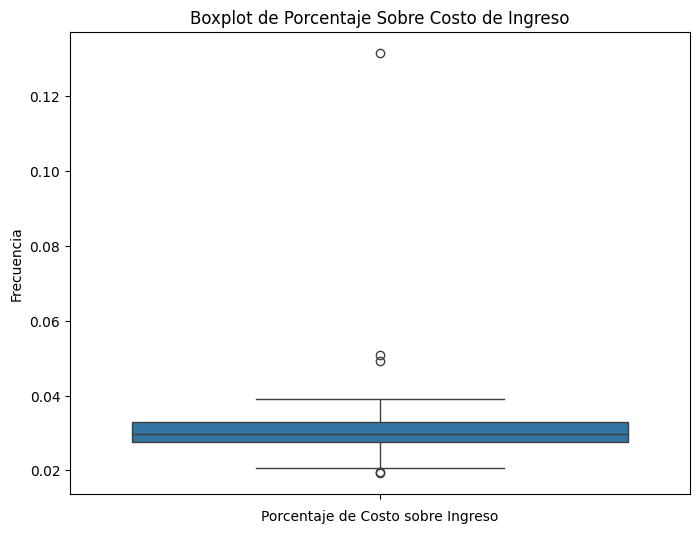

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=dataframe_merg["porcentaje_costo_ingreso"])
plt.title("Boxplot de Porcentaje Sobre Costo de Ingreso")
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel("Frecuencia")
plt.show()

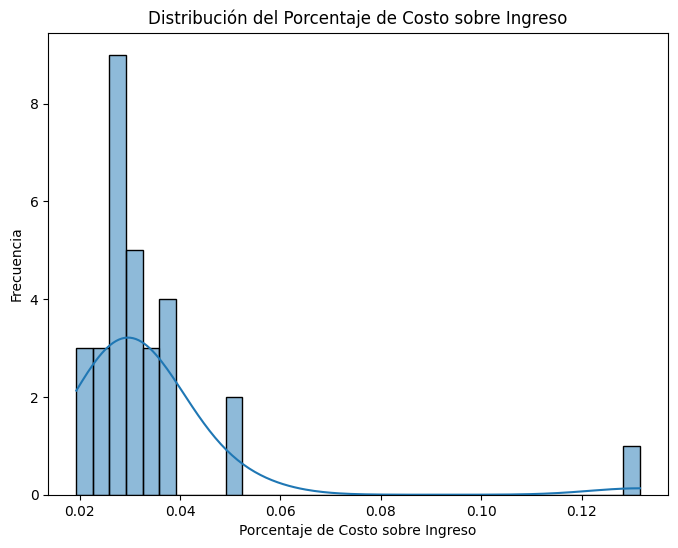

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x=dataframe_merg['porcentaje_costo_ingreso'],kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

Analisis de outliers mediante rango intercuartil.

In [ ]:
Q1 = dataframe_merg['porcentaje_costo_ingreso'].quantile(0.25)
Q3 = dataframe_merg['porcentaje_costo_ingreso'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + (1.5 * IQR)
limite_inferior = Q1 - (1.5 * IQR)

outliers = dataframe_merg[(dataframe_merg['porcentaje_costo_ingreso'] < limite_inferior) | (dataframe_merg['porcentaje_costo_ingreso'] > limite_superior)]

print("Análisis de outliers:")
display(outliers)

print(f"Número de outliers:{len(outliers)}")

Análisis de outliers:


,producto,precio_por_cantidad,costo,porcentaje_costo_ingreso
6,Candelabro,11128.80,14.65,0.131640
14,Heladera,25736.80,13.11,0.050939
28,Tablet,25856.57,12.72,0.049194
20,Microondas,72562.89,14.19,0.019555
19,Lámpara De Mesa,82276.38,15.93,0.019362


Número de outliers:5


Análisis de productos más y menos rentables:

In [ ]:
productos_mas_rentables = dataframe_merg.sort_values(by='porcentaje_costo_ingreso', ascending=True)

print("Mayor costo de marketing sobre ingreso:")
display(productos_mas_rentables.head())
print("Menor costo de marketing sobre ingreso:")
display(productos_mas_rentables.tail().sort_values(by='porcentaje_costo_ingreso', ascending=False))


Mayor costo de marketing sobre ingreso:


,producto,precio_por_cantidad,costo,porcentaje_costo_ingreso
19,Lámpara De Mesa,82276.38,15.93,0.019362
20,Microondas,72562.89,14.19,0.019555
3,Auriculares,74175.58,15.24,0.020546
18,Lavadora,48946.44,11.85,0.024210
23,Proyector,48187.00,12.47,0.025878


Menor costo de marketing sobre ingreso:


,producto,precio_por_cantidad,costo,porcentaje_costo_ingreso
6,Candelabro,11128.80,14.65,0.131640
14,Heladera,25736.80,13.11,0.050939
28,Tablet,25856.57,12.72,0.049194
1,Alfombra,44773.06,17.46,0.038997
8,Cortinas,44865.03,17.36,0.038694


In [ ]:
print(ventas_metricas.head(5))

          producto     total  unidades  promedio  registros
0  Adorno De Pared  48093.49       633     76.10        100
1         Alfombra  44773.06       615     74.10        100
2       Aspiradora  50085.86       651     77.45        100
3      Auriculares  74175.58       958     76.30        143
4         Batidora   50979.2       672     77.54        100


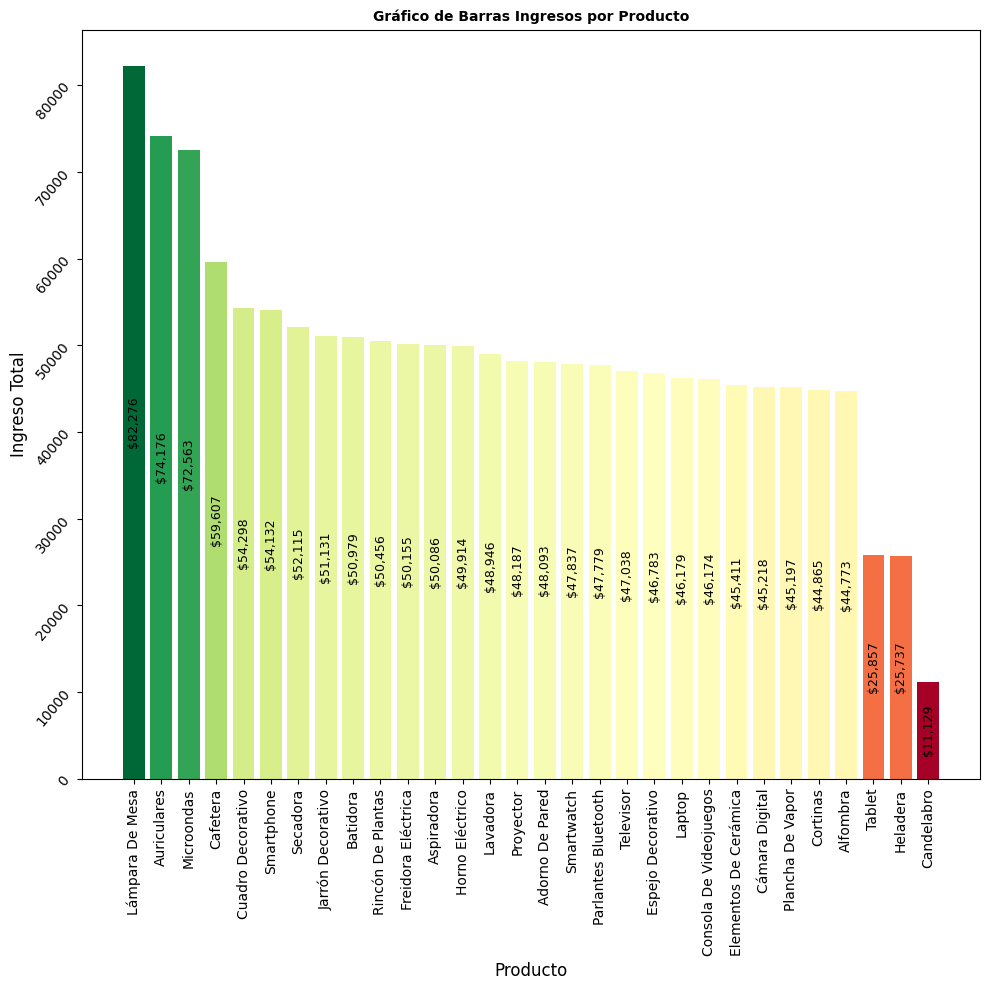

In [ ]:
df = ventas_metricas.copy()

df_ordenado = df.sort_values("total", ascending=False)

plt.figure(figsize=(10,10))

norm = plt.Normalize(df_ordenado["total"].min(), df_ordenado["total"].max())
cmap = plt.colormaps['RdYlGn']


colors = [cmap(norm(value)) for value in df_ordenado["total"]]

grafbar = plt.bar(df_ordenado["producto"], df_ordenado["total"], color=colors)

plt.title("Gráfico de Barras Ingresos por Producto", fontsize=10, weight="bold")

plt.xlabel("Producto", fontsize=12)
plt.ylabel("Ingreso Total", fontsize=12)

plt.xticks(rotation=90)
plt.yticks(rotation=50)

for barra in grafbar:
  y = barra.get_height()
  plt.text(barra.get_x() + barra.get_width() / 2, y / 2, f"${y:,.0f}", ha='center', va='center', fontsize=9, color="black", rotation=90)

plt.tight_layout()
plt.show()

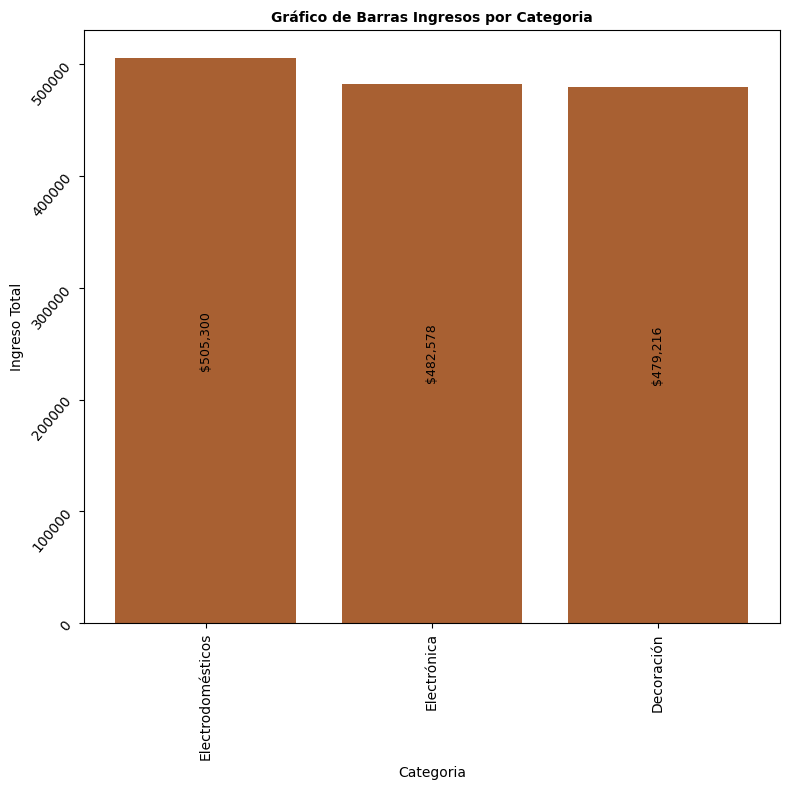

In [ ]:
df_cat = resumen_categoria.copy()

df_cat_ordenado = df_cat.sort_values("ingreso_cat_total", ascending=False)

plt.figure(figsize=(8,8))

color = "#a86032"

grafbar = plt.bar(df_cat_ordenado["categoria"], df_cat_ordenado["ingreso_cat_total"], color=color)

plt.xlabel("Categoria")
plt.ylabel("Ingreso Total")

plt.title("Gráfico de Barras Ingresos por Categoria", fontsize=10, weight="bold")

plt.xticks(rotation=90)
plt.yticks(rotation=50)

for barra in grafbar:
  y = barra.get_height()
  plt.text(barra.get_x() + barra.get_width() / 2, y / 2, f"${y:,.0f}", ha='center', va='center', fontsize=9, color="black", rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
Medidas_de_tendencia = {
    'Media' : [df_cat["ingreso_cat_total"].mean()],
    'Mediana' : [df_cat["ingreso_cat_total"].median()],
    'Moda' : [df_cat["ingreso_cat_total"].mode()]
}

df_tendencias = pd.DataFrame(Medidas_de_tendencia)
df_tendencias['Media'] = round(df_tendencias['Media'], 2)

display(df_tendencias)

,Media,Mediana,Moda
0,489031.17,482577.8,0 479216.09 1 482577.8 2 505299.63 N...


In [ ]:
mean_val = resumen_categoria["ingreso_cat_total"].mean()
median_val = resumen_categoria["ingreso_cat_total"].median()
mode_vals = resumen_categoria["ingreso_cat_total"].mode()

data_rows = []

data_rows.append({'Estadística': 'Media', 'Valor': mean_val})

data_rows.append({'Estadística': 'Mediana', 'Valor': median_val})

for i, mode_v in enumerate(mode_vals):
    data_rows.append({'Estadística': f'Moda {i+1}', 'Valor': mode_v})

df_tendencias_separado = pd.DataFrame(data_rows)

df_tendencias_separado['Valor'] = round(df_tendencias_separado['Valor'], 2)

display(df_tendencias_separado)

,Estadística,Valor
0,Media,489031.17
1,Mediana,482577.80
2,Moda 1,479216.09
3,Moda 2,482577.80
4,Moda 3,505299.63


In [ ]:
rango = df_cat["ingreso_cat_total"].max() - df_cat["ingreso_cat_total"].min()
varianza = df_cat["ingreso_cat_total"].var(ddof=1)
desviacion = df_cat["ingreso_cat_total"].std(ddof=1)


data_rows2 = []

data_rows2.append({"Medida": "Rango", "Valor": rango})

data_rows2.append({"Medida": "Varianza", "Valor": varianza})

data_rows2.append({"Medida": "Desviacion", "Valor": desviacion})


df_medidas_dispersión = pd.DataFrame(data_rows2)

# Gemini
df_medidas_dispersión['Valor'] = df_medidas_dispersión['Valor'].apply(lambda x: f'{x:,.2f}')

display(df_medidas_dispersión)

,Medida,Valor
0,Rango,"26,083.54"
1,Varianza,"201,322,285.27"
2,Desviacion,"14,188.81"


# 2- Análisis Exploratorio de Datos (EDA):

Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

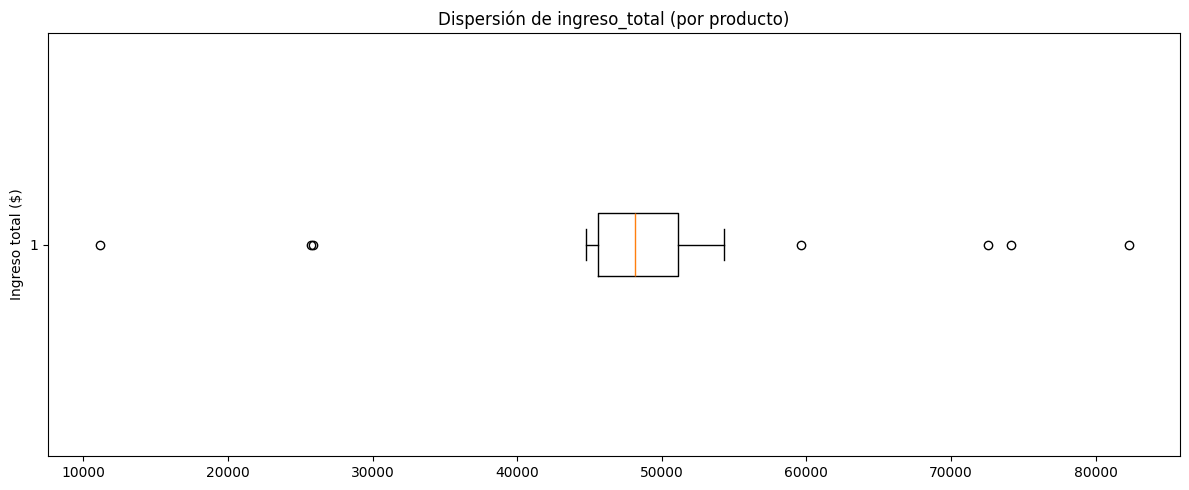

In [ ]:
valores = ventas_metricas['total'].dropna()

plt.figure(figsize=(12, 5))
plt.boxplot(valores, vert=False)
plt.title('Dispersión de ingreso_total (por producto)')
plt.ylabel('Ingreso total ($)')
plt.tight_layout()
plt.show()